# NN.Backprop.01:

$$
E = \frac{1}{2}(y - \hat{y})^2
$$

Sigmoid-Funktion:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \qquad
\sigma'(z) = \sigma(z)\,(1 - \sigma(z))
$$

## Vorwärtsrechnung

$$
\begin{aligned}
z^{(1)} &= W^{(1)} x, & a^{(1)} &= \sigma(z^{(1)}) \\
z^{(2)} &= W^{(2)} a^{(1)}, & a^{(2)} &= \sigma(z^{(2)}) \\
z^{(3)} &= W^{(3)} a^{(2)}, & \hat{y} &= \sigma(z^{(3)})
\end{aligned}
$$

## Backpropagation

### Fehlerterm der Ausgabeschicht

$$
\delta^{(3)} = (\hat{y} - y)\,\hat{y}(1 - \hat{y})
$$

### Fehlerterm der zweiten versteckten Schicht

$$
\delta^{(2)} =
(W^{(3)})^T \delta^{(3)} \odot a^{(2)}(1 - a^{(2)})
$$

### Fehlerterm der ersten versteckten Schicht

$$
\delta^{(1)} =
(W^{(2)})^T \delta^{(2)} \odot a^{(1)}(1 - a^{(1)})
$$

## Gewichtsupdates der ersten versteckten Schicht

$$
\frac{\partial E}{\partial W^{(1)}} = \delta^{(1)} x^T
$$

Update-Regel mit Lernrate $\eta$:

$$
W^{(1)} \leftarrow W^{(1)} - \eta\, \delta^{(1)} x^T
$$


In [8]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

np.random.seed(0)

x = np.random.randn(3, 1)
y = np.array([[1]])

W1 = np.random.randn(4, 3)
W2 = np.random.randn(3, 4)
W3 = np.random.randn(1, 3)

a1 = sigmoid(W1 @ x)
a2 = sigmoid(W2 @ a1)
y_hat = sigmoid(W3 @ a2)

delta3 = (y_hat - y) * sigmoid_derivative(y_hat)
delta2 = (W3.T @ delta3) * sigmoid_derivative(a2)
delta1 = (W2.T @ delta2) * sigmoid_derivative(a1)

eta = 0.1
dW1 = delta1 @ x.T
W1_new = W1 - eta * dW1

print(f"Vorhersage y_hat: {y_hat.item():.4f}")
print(f"Fehlerterm delta^(1) (Norm): {np.linalg.norm(delta1):.4f}")
print(f"||ΔW^(1)||: {np.linalg.norm(W1_new - W1):.4f}")

Vorhersage y_hat: 0.6872
Fehlerterm delta^(1) (Norm): 0.0038
||ΔW^(1)||: 0.0008


# NN.Backprop.02: Forward- und Backpropagation

## Gegebenes Netzwerk

- Skalarer Input: \( x \)
- Zielwert: \( y_T \)
- Aktivierungsfunktion (beide Zellen):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Quadratische Fehlerfunktion:

$$
E = \frac{1}{2}(y_T - y)^2
$$

### Gewichte (aus Abbildung)

- Input → Zelle 1: \( w_{x1} = -1 \)
- Bias Zelle 1: \( b_1 = 1 \)
- Zelle 1 → Zelle 2: \( w_{12} = 1 \)
- Input → Zelle 2: \( w_{x2} = 2 \)
- Bias Zelle 2: \( b_2 = -2 \)



## 1️ Vorwärtsrechnung für \( (x, y_T) = (0, 0.5) \)

### Zelle 1

$$
z_1 = -1 \cdot 0 + 1 = 1
$$

$$
a_1 = \sigma(1) \approx 0.7311
$$

### Zelle 2 (Ausgabe)

$$
z_2 = 1 \cdot a_1 + 2 \cdot 0 - 2 = a_1 - 2
$$

$$
y = \sigma(z_2) = \sigma(-1.2689) \approx 0.2194
$$

## Fehler

$$
E = \frac{1}{2}(0.5 - 0.2194)^2 \approx 0.0394
$$

## 2️ Backpropagation

### Fehlerterm Ausgabeschicht

$$
\delta_2 = (y - y_T)\, y(1 - y)
$$

### Fehlerterm Zelle 1

$$
\delta_1 = \delta_2 \cdot w_{12} \cdot a_1(1 - a_1)
$$

## Gewichtsupdates (Lernrate \( α = 0.01 \))

$$
\Delta w_{12} = - \alpha \, \delta_2 \, a_1
$$

$$
\Delta w_{x2} = - \alpha \, \delta_2 \, x
$$

$$
\Delta w_{x1} = - \alpha \, \delta_1 \, x
$$


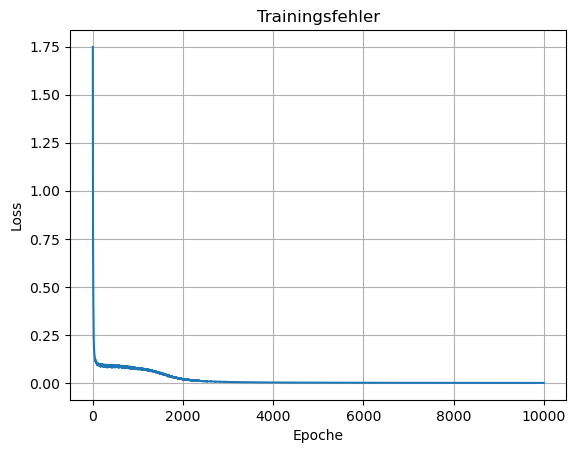

Finaler Loss nach 10000 Epochen: 0.000576


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle

# Aktivierungsfunktionen
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        self.lr = lr
        # Initialisierung: Mehr Neuronen benötigen oft kleinere Initialisierungsgewichte
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    def forward(self, x):
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, x, y, output):
        # Fehler Output
        error = output - y
        delta2 = error 

        # Gradienten Layer 2
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        # Fehler Hidden Layer
        delta1 = np.dot(delta2, self.W2.T) * relu_deriv(self.z1)

        # Gradienten Layer 1
        dW1 = np.dot(x.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        # Update
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=1))

# Setup

iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# NETZ-ERWEITERUNG: 50 Hidden Neurons für höhere Kapazität
nn = MLP(input_size=4, hidden_size=50, output_size=3, lr=0.01)

# Training
epochs = 10000
loss_history = []

for epoch in range(epochs):
    X_train, y_train = shuffle(X_scaled, y_onehot)
    epoch_loss = 0
    
    for i in range(len(X_train)):
        x_sample = X_train[i:i+1]
        y_sample = y_train[i:i+1]
        
        output = nn.forward(x_sample)
        nn.backward(x_sample, y_sample, output)
        epoch_loss += nn.compute_loss(y_sample, output)
    
    loss_history.append(epoch_loss / len(X_train))

# Plot

plt.plot(loss_history)
plt.title('Trainingsfehler')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

print(f"Finaler Loss nach {epochs} Epochen: {loss_history[-1]:.6f}")